### Importing Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

### Loading Data and Preprocessing

In [2]:
 raw_data = yfinance.download(tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = '1994-01-07', end = '2019-09-01', 
                              interval = '1d', group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  4 of 4 completed


In [4]:
df_comp = raw_data.copy()

In [5]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [6]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']

In [7]:
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

### Creating Returns

In [8]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_dax'] = df_comp.dax.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.spx.pct_change(1).mul(100)

### Normalizing

In [ ]:
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp[1]) * 100
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp[1]) * 100
df_comp['norm_ret_dax'] = df_comp.ret_dax.div(df_comp[1]) * 100
df_comp['norm_ret_nikkei'] = df_comp.ret_nikkei.div(df_comp[1]) * 100

### Splitting the Data

In [10]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### Fitting

In [12]:
start_date = '2014-07-15'
end_date = '2015-01-01'
model_arima = ARIMA(df.ret_ftse[1:], order = (1,1,1))
results_arima = model_arima.fit()
df_pred_arima = results_arima.predict(start = start_date, end = end_date)

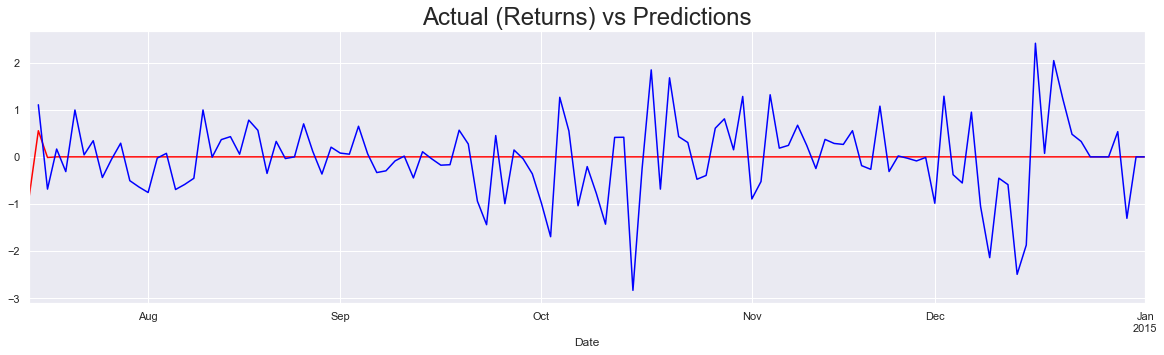

In [13]:
df_pred_arima[start_date:end_date].plot(figsize = (20,5), color = 'red')
df_test.ret_ftse[start_date:end_date].plot(color = 'blue')
plt.title('Actual (Returns) vs Predictions', size = 24)
plt.show()

In [16]:
df_pred_arima.head(20)

2014-07-15   -0.839512
2014-07-16    0.555017
2014-07-17   -0.012738
2014-07-18    0.000291
2014-07-21   -0.000008
2014-07-22   -0.000001
2014-07-23   -0.000002
2014-07-24   -0.000002
2014-07-25   -0.000002
2014-07-28   -0.000002
2014-07-29   -0.000002
2014-07-30   -0.000002
2014-07-31   -0.000002
2014-08-01   -0.000002
2014-08-04   -0.000002
2014-08-05   -0.000002
2014-08-06   -0.000002
2014-08-07   -0.000002
2014-08-08   -0.000002
2014-08-11   -0.000002
Freq: B, dtype: float64